# Figure 1: LLM \neq Human

## Import necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import os
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

## Load ground truth parameters

In [2]:
with open('../data/ground_truth.pkl', 'rb') as f:
    res = pkl.load(f)
    params = res['params']
print('Ground truth parameters:', params)

Ground truth parameters: [ 0.36310104  0.7465673   0.32377172 -0.21252407  0.08090729 -0.09540857
 -0.40639496 -0.15332593 -0.24158926  0.17760716 -0.04599298]


## Plot Figure 1

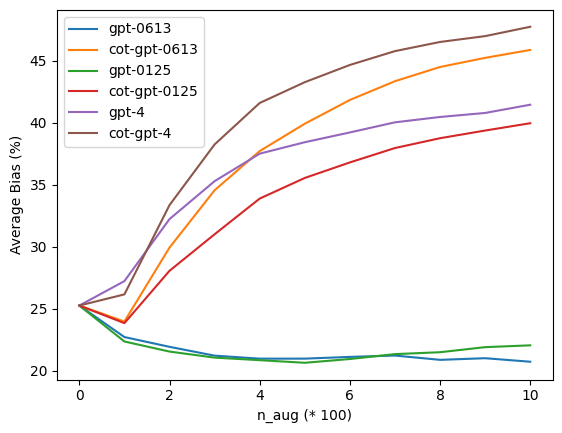

In [3]:
n_trials = 50
n_real = 100
n_max_aug = 1000
n_all = n_real + n_max_aug

ax = plt.subplot()
methods = ['gpt-0613', 'cot-gpt-0613', 'gpt-0125', 'cot-gpt-0125', 'gpt-4', 'cot-gpt-4', 'real']
for method in methods:
    res_file = f'../res/naive_{method}_{n_real}_{n_max_aug}_{n_trials}.pkl'
    if not os.path.exists(res_file):
        continue
    with open(res_file, 'rb') as f:
        res = pkl.load(f)
    n_aug_list, n_real_list, sample_id_list, params_est_list = res['n_aug_list'],res['n_real_list'], res['sample_id_list'], np.array(res['params_list'])
    bias_list = []
    for i in range(11):
        df = pd.DataFrame({'n_real': n_real_list, 'n_aug': n_aug_list, 'sample_id': sample_id_list, 'param': params_est_list[:,i],
                        're': (np.abs(params_est_list[:,i] - params[i])) / (np.abs(params[i]) + 1)})
        df_agg = df.groupby(['n_aug']).agg(rbias=('re', 'mean')).reset_index()
        bias_list.append(np.array(df_agg['rbias']) * 100)

    bias_list = np.array(bias_list)
    bias_redu = bias_list - bias_list[:,0].reshape(11,1)  # relative_bias_reduction
    ax.plot((np.sum(bias_list, axis=0)/11), label=method)
    plt.ylabel('Average Bias (%)')
    plt.xlabel('n_aug (* 100)')
    
ax.legend()
plt.show()
